In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import requests
import json
from citipy import citipy 
import time 
from datetime import datetime
import os
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv("weather_api_key")

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 
coordinates 

[(87.4704499711375, -8.079171552144658),
 (-31.195010419895674, 17.246785887970134),
 (-1.5409715890612858, 82.33585284992745),
 (41.19881641498495, -171.10654873592188),
 (10.382188876742674, -21.42125901075866),
 (-16.903346059974794, 168.10028411979334),
 (-53.93653165145411, -100.2145117072886),
 (-26.973413475719568, -163.56834810639265),
 (79.55297084373021, 122.81846911030664),
 (57.37871125352092, -75.75771212528316),
 (10.42025025415387, 156.27050272835731),
 (31.476487659284018, 6.519978529797044),
 (30.559504331479275, 60.92217751813206),
 (44.668227675608165, 1.1097716943702096),
 (80.36003941844137, 5.46139687869524),
 (28.040155951213023, 114.29129188549706),
 (-77.72156771445799, 64.8633560516312),
 (-67.25920889493763, -144.87232616844327),
 (38.659782452069095, -2.5919541717509276),
 (89.62613784935789, -105.78996744936974),
 (54.7845347775268, 179.23979788406473),
 (-32.838911279958474, -60.88369329232492),
 (47.0622748767326, 124.24224089415486),
 (-46.60676063739656

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.4704499711375 -8.079171552144658
-31.195010419895674 17.246785887970134
-1.5409715890612858 82.33585284992745
41.19881641498495 -171.10654873592188
10.382188876742674 -21.42125901075866
-16.903346059974794 168.10028411979334
-53.93653165145411 -100.2145117072886
-26.973413475719568 -163.56834810639265
79.55297084373021 122.81846911030664
57.37871125352092 -75.75771212528316
10.42025025415387 156.27050272835731
31.476487659284018 6.519978529797044
30.559504331479275 60.92217751813206
44.668227675608165 1.1097716943702096
80.36003941844137 5.46139687869524
28.040155951213023 114.29129188549706
-77.72156771445799 64.8633560516312
-67.25920889493763 -144.87232616844327
38.659782452069095 -2.5919541717509276
89.62613784935789 -105.78996744936974
54.7845347775268 179.23979788406473
-32.838911279958474 -60.88369329232492
47.0622748767326 124.24224089415486
-46.60676063739656 -178.25806246515404
-0.1305247238896925 128.16669430292058
67.9698070758788 110.07335786283295
-2.9730052438716115 -

78.67794994002318 77.0181317042045
3.6054101728812356 -178.0504589617159
14.7259591231619 54.73310434188568
-23.312257535966097 -127.771759158244
-45.86791211873007 37.120493073887616
8.660588020870819 132.40519567052036
10.079731108042253 -21.438372098961878
-54.89541861617342 28.196958293620753
4.311752438968114 138.30632498912945
-7.19062904962226 -106.27414675150285
16.183010125163605 129.33289710694748
-77.32896063404033 86.28606899618427
-63.071507588923176 136.45800797725258
13.878263212287678 82.48728578316621
83.29385099435228 -32.614125881904215
58.27346503111295 -60.29983629383909
0.36080333589271163 49.63940469584125
-72.6746078035377 166.7497449567062
-16.623163303465205 100.39499158903465
88.16886626411141 -142.42837750277414
-12.496331480038265 -70.90278289303502
-25.8867887000048 53.473798101560305
31.22743127878232 -123.15474006173547
-67.70521761321207 150.81701134931785
18.19065238634137 -55.879756145503904
-25.86786573517253 -9.226046523415732
-11.004498228458672 -7

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city) 
# Print the city count to confirm sufficient count.
len(cities) 

632

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c4e0d9dac9a2d618a841e31a6bf64179


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 13 | vredendal
Processing Record 3 of Set 13 | matara
Processing Record 4 of Set 13 | bethel
Processing Record 5 of Set 13 | praia
Processing Record 6 of Set 13 | vila
Processing Record 7 of Set 13 | castro
Processing Record 8 of Set 13 | avarua
Processing Record 9 of Set 13 | tiksi
Processing Record 10 of Set 13 | chapais
Processing Record 11 of Set 13 | kavieng
Processing Record 12 of Set 13 | warqla
City not found. Skipping...
Processing Record 13 of Set 13 | zabol
Processing Record 14 of Set 13 | sarlat-la-caneda
Processing Record 15 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 13 | yichun
Processing Record 17 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | villarrobledo
Processing Record 20 of Set 13 | yellowknife
Processing Record 21 of Set 13 | beringovskiy
Processing

Processing Record 32 of Set 16 | yomitan
City not found. Skipping...
Processing Record 33 of Set 16 | najran
Processing Record 34 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 16 | kabalo
Processing Record 36 of Set 16 | conceicao do araguaia
Processing Record 37 of Set 16 | gornopravdinsk
Processing Record 38 of Set 16 | marawi
Processing Record 39 of Set 16 | dunmore town
Processing Record 40 of Set 16 | norman wells
Processing Record 41 of Set 16 | le port
Processing Record 42 of Set 16 | labuhan
Processing Record 43 of Set 16 | hilo
Processing Record 44 of Set 16 | kodiak
Processing Record 45 of Set 16 | alice springs
Processing Record 46 of Set 16 | sibolga
Processing Record 47 of Set 16 | cherskiy
Processing Record 48 of Set 16 | ponta do sol
Processing Record 49 of Set 16 | chokurdakh
Processing Record 50 of Set 16 | meulaboh
Processing Record 1 of Set 17 | yerbogachen
Processing Record 2 of Set 17 | dryden
Processing Record 3 of Set 17 | ahipara
P

Processing Record 18 of Set 20 | bose
Processing Record 19 of Set 20 | barra dos coqueiros
Processing Record 20 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 20 | fayetteville
Processing Record 22 of Set 20 | karachi
Processing Record 23 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 20 | balkanabat
Processing Record 25 of Set 20 | atar
Processing Record 26 of Set 20 | maningrida
Processing Record 27 of Set 20 | goundi
Processing Record 28 of Set 20 | sorong
Processing Record 29 of Set 20 | virginia beach
Processing Record 30 of Set 20 | tiarei
Processing Record 31 of Set 20 | heilbron
Processing Record 32 of Set 20 | mazara del vallo
Processing Record 33 of Set 20 | hithadhoo
Processing Record 34 of Set 20 | peniche
Processing Record 35 of Set 20 | high level
Processing Record 36 of Set 20 | soligalich
Processing Record 37 of Set 20 | dukat
Processing Record 38 of Set 20 | fairbanks
Processing Record 39 of Set 20 | kimi
City not fou

Processing Record 3 of Set 24 | kaduqli
Processing Record 4 of Set 24 | coahuayana
Processing Record 5 of Set 24 | aurillac
Processing Record 6 of Set 24 | salalah
Processing Record 7 of Set 24 | gigmoto
Processing Record 8 of Set 24 | kattivakkam
Processing Record 9 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 24 | paucartambo
City not found. Skipping...
Processing Record 11 of Set 24 | saint-francois
Processing Record 12 of Set 24 | paramonga
Processing Record 13 of Set 24 | raurkela
City not found. Skipping...
Processing Record 14 of Set 24 | mananjary
Processing Record 15 of Set 24 | tambovka
Processing Record 16 of Set 24 | paragominas
Processing Record 17 of Set 24 | necochea
Processing Record 18 of Set 24 | la ronge
Processing Record 19 of Set 24 | ambon
Processing Record 20 of Set 24 | przhevalskoye
Processing Record 21 of Set 24 | kisangani
Processing Record 22 of Set 24 | igarka
Processing Record 23 of Set 24 | dergachi
Processing Record 2

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vredendal,-31.6683,18.5012,45.95,59,0,6.42,ZA,2022-08-01 04:44:56
1,Matara,5.9485,80.5353,78.51,89,98,15.99,LK,2022-08-01 04:44:56
2,Bethel,41.3712,-73.4140,74.25,88,75,3.44,US,2022-08-01 04:44:57
3,Praia,14.9215,-23.5087,77.54,73,75,11.50,CV,2022-08-01 04:44:58
4,Vila,42.0304,-8.1588,63.48,51,0,4.36,PT,2022-08-01 04:44:58
5,Castro,-24.7911,-50.0119,51.24,80,0,1.66,BR,2022-08-01 04:44:59
6,Avarua,-21.2078,-159.7750,73.45,88,40,10.36,CK,2022-08-01 04:44:59
7,Tiksi,71.6872,128.8694,40.17,93,100,17.05,RU,2022-08-01 04:45:00
8,Chapais,49.7834,-74.8492,56.98,84,95,3.58,CA,2022-08-01 04:45:00
9,Kavieng,-2.5744,150.7967,85.06,71,82,17.45,PG,2022-08-01 04:45:01


In [14]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']  
city_data_df = city_data_df[city_data_reordered] 
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vredendal,ZA,2022-08-01 04:44:56,-31.6683,18.5012,45.95,59,0,6.42
1,Matara,LK,2022-08-01 04:44:56,5.9485,80.5353,78.51,89,98,15.99
2,Bethel,US,2022-08-01 04:44:57,41.3712,-73.4140,74.25,88,75,3.44
3,Praia,CV,2022-08-01 04:44:58,14.9215,-23.5087,77.54,73,75,11.50
4,Vila,PT,2022-08-01 04:44:58,42.0304,-8.1588,63.48,51,0,4.36
...,...,...,...,...,...,...,...,...,...
568,Mandalgovi,MN,2022-08-01 04:50:29,45.7625,106.2708,83.53,25,46,12.33
569,Iquitos,PE,2022-08-01 04:50:35,-3.7481,-73.2472,77.04,94,75,4.61
570,Kashan,IR,2022-08-01 04:50:35,33.9831,51.4364,87.39,25,2,4.61
571,Kupang,ID,2022-08-01 04:50:36,-10.1667,123.5833,84.58,62,46,3.98


In [69]:
# Create the output file (CSV).
 
output_data_file = "/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/cities.csv"
    
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"] 

In [74]:
# Get today's date in seconds.
today = time.time()
today 

1659332699.720209

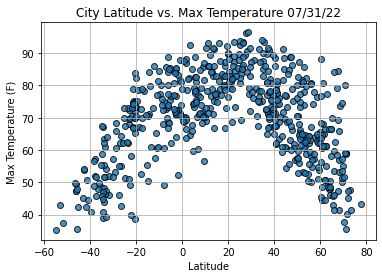

In [76]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

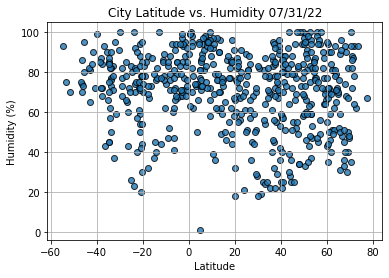

In [80]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

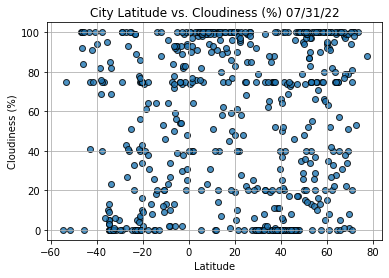

In [81]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

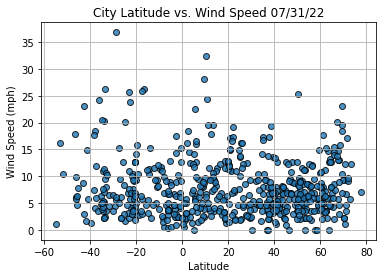

In [82]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/kristafederas/Desktop/UCB/Module6Challenge/World_Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()